### Data Exploration Time Series Exercises

Do your work for this exercise in a notebook named explore. Use the techniques in the lesson to explore the store item demand dataset and the opsd dataset.

For the store item demand data, you will need to choose a method of aggregating such that each observation is a unique date. For both datasets you should choose a method of splitting your data and only explore the training split.

In [1]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
import statsmodels.api as sm
from datetime import timedelta, datetime
from sklearn.model_selection import TimeSeriesSplit

# =ignore warningn
import warnings
warnings.filterwarnings("ignore")

import acquire as a
import prepare as p

#### API Data

In [2]:
sales_api_df = a.acq_api_data('sales')
items_api_df = a.acq_api_data('items')
stores_api_df = a.acq_api_data('stores')

In [3]:
api_df = a.combine_dfs(sales_api_df, stores_api_df, items_api_df)
api_df = p.prepare_api_df(api_df)
api_df.info()

<class 'pandas.core.frame.DataFrame'>
DatetimeIndex: 7415 entries, 2013-01-01 00:00:00+00:00 to 2017-12-31 00:00:00+00:00
Data columns (total 18 columns):
 #   Column         Non-Null Count  Dtype  
---  ------         --------------  -----  
 0   item           7415 non-null   int64  
 1   sale_amount    7415 non-null   float64
 2   sale_id        7415 non-null   int64  
 3   store          7415 non-null   int64  
 4   store_address  7415 non-null   object 
 5   store_city     7415 non-null   object 
 6   store_id       7415 non-null   int64  
 7   store_state    7415 non-null   object 
 8   store_zipcode  7415 non-null   object 
 9   item_brand     7415 non-null   object 
 10  item_id        7415 non-null   int64  
 11  item_name      7415 non-null   object 
 12  item_price     7415 non-null   float64
 13  item_upc12     7415 non-null   int64  
 14  item_upc14     7415 non-null   int64  
 15  month          7415 non-null   object 
 16  day_of_week    7415 non-null   object 
 17  sale

In [4]:
api_df.head()

,item,sale_amount,sale_id,store,store_address,store_city,store_id,store_state,store_zipcode,item_brand,item_id,item_name,item_price,item_upc12,item_upc14,month,day_of_week,sales_total
sale_date,,,,,,,,,,,,,,,,,,
2013-01-01 00:00:00+00:00,1,13.0,1,1,12125 Alamo Ranch Pkwy,San Antonio,1,TX,78253,Riceland,1,Riceland American Jazmine Rice,0.84,35200264013,35200264013,January,Tuesday,10.92
2013-01-01 00:00:00+00:00,1,19.0,3653,3,2118 Fredericksburg Rdj,San Antonio,3,TX,78201,Riceland,1,Riceland American Jazmine Rice,0.84,35200264013,35200264013,January,Tuesday,15.96
2013-01-01 00:00:00+00:00,1,10.0,5479,4,516 S Flores St,San Antonio,4,TX,78204,Riceland,1,Riceland American Jazmine Rice,0.84,35200264013,35200264013,January,Tuesday,8.40
2013-01-01 00:00:00+00:00,1,11.0,7305,5,1520 Austin Hwy,San Antonio,5,TX,78218,Riceland,1,Riceland American Jazmine Rice,0.84,35200264013,35200264013,January,Tuesday,9.24
2013-01-01 00:00:00+00:00,1,12.0,1827,2,9255 FM 471 West,San Antonio,2,TX,78251,Riceland,1,Riceland American Jazmine Rice,0.84,35200264013,35200264013,January,Tuesday,10.08


In [5]:
# let's look at max and min dates
api_df.index.min(), api_df.index.max()

(Timestamp('2013-01-01 00:00:00+0000', tz='UTC'),
 Timestamp('2017-12-31 00:00:00+0000', tz='UTC'))

In [6]:
# let's split the data into train and test sets

train = api_df[:'2016']
test = api_df['2017']

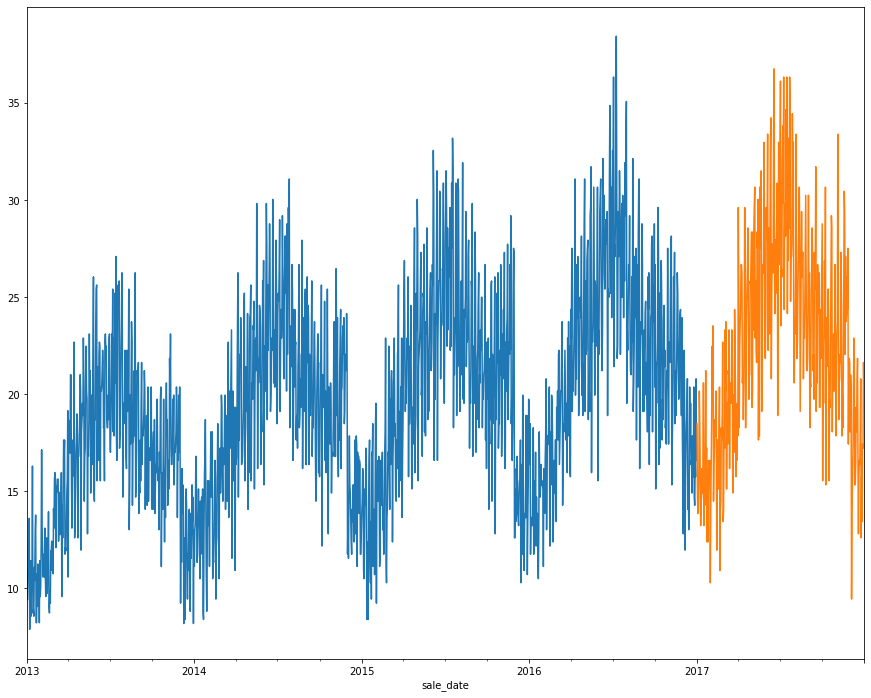

In [16]:
# let's do a visualization of the sales over time
plt.figure(figsize = (15, 12))
train.resample('D').sales_total.mean().plot()
test.resample('D').sales_total.mean().plot();

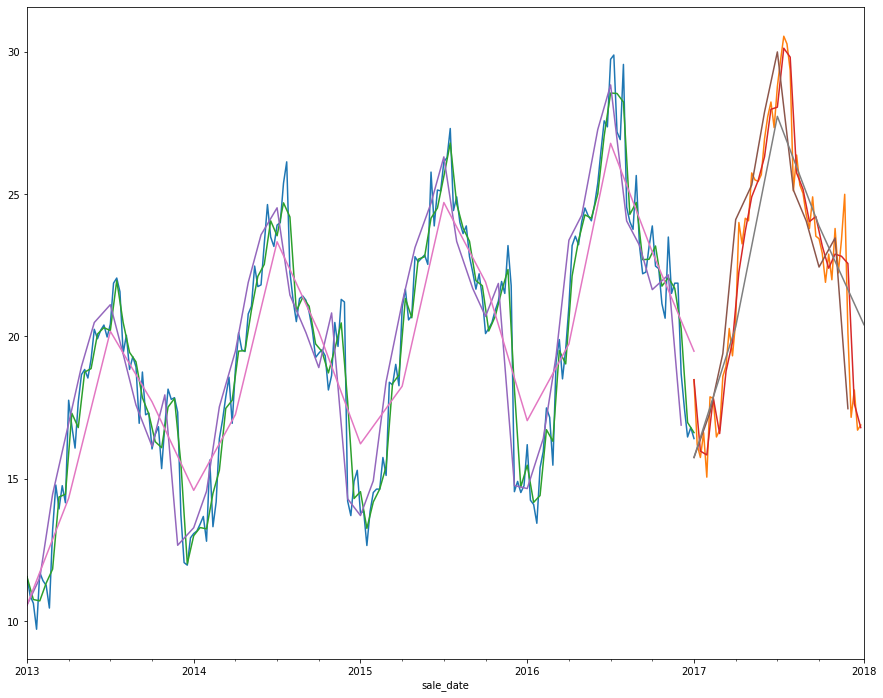

In [15]:
date_list = ['W', '2W', 'M', '3M']

plt.figure(figsize = (15, 12))

for e in date_list:
    train.resample(e).sales_total.mean().plot()
    test.resample(e).sales_total.mean().plot();

#### OPSD Data

In [17]:
opsd_data = a.get_opsd_germany()
opsd_data = p.prepare_opsd_df(opsd_data)
opsd_data.info()

<class 'pandas.core.frame.DataFrame'>
DatetimeIndex: 4383 entries, 2006-01-01 to 2017-12-31
Data columns (total 6 columns):
 #   Column       Non-Null Count  Dtype  
---  ------       --------------  -----  
 0   Consumption  4383 non-null   float64
 1   Wind         4383 non-null   float64
 2   Solar        4383 non-null   float64
 3   Wind+Solar   4383 non-null   float64
 4   month        4383 non-null   object 
 5   year         4383 non-null   int64  
dtypes: float64(4), int64(1), object(1)
memory usage: 239.7+ KB


In [18]:
opsd_data.head()

,Consumption,Wind,Solar,Wind+Solar,month,year
Date,,,,,,
2006-01-01,1069.184,0.0,0.0,0.0,January,2006
2006-01-02,1380.521,0.0,0.0,0.0,January,2006
2006-01-03,1442.533,0.0,0.0,0.0,January,2006
2006-01-04,1457.217,0.0,0.0,0.0,January,2006
2006-01-05,1477.131,0.0,0.0,0.0,January,2006


In [19]:
# let's look at max and min dates
opsd_data.index.min(), opsd_data.index.max()

(Timestamp('2006-01-01 00:00:00'), Timestamp('2017-12-31 00:00:00'))

In [29]:
# let's split the data into train and test sets

train = opsd_data[:'2015']
test = opsd_data['2016':]

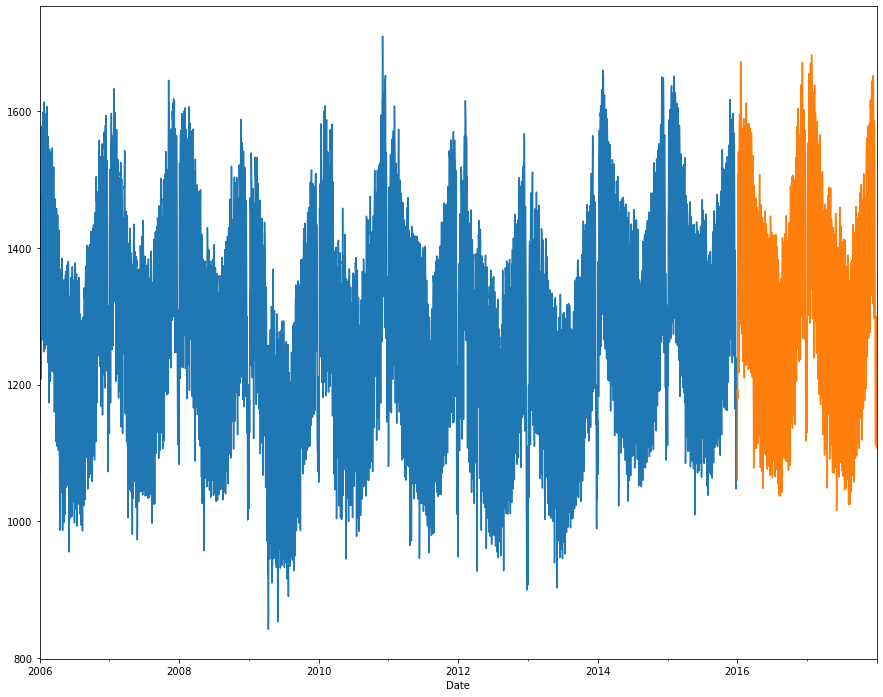

In [32]:
# let's do a visualization of the consumption over time
plt.figure(figsize = (15, 12))
train.resample('D').Consumption.mean().plot()
test.resample('D').Consumption.mean().plot();

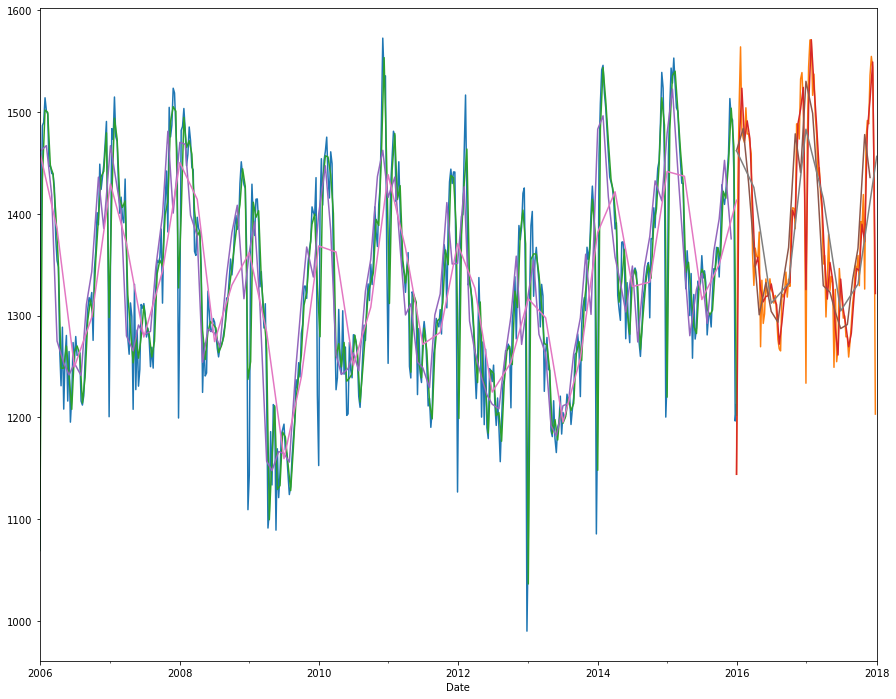

In [33]:
date_list = ['W', '2W', 'M', '3M']

plt.figure(figsize = (15, 12))

for e in date_list:
    train.resample(e).Consumption.mean().plot()
    test.resample(e).Consumption.mean().plot();